# Cars Dataset Analysis

Dataset Desription

This dataset contains specifications for 1,218 cars, including details like engine type, battery capacity, horsepower, top speed, fuel type, and price. All columns are currently in string format, with a few missing values and 4 duplicate rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
# using 'ISO-8859-1' encoding to properly read special characters that may not be supported by default 'utf-8'
df = pd.read_csv("Cars  Datasets.csv", encoding='ISO-8859-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [4]:
df['CC/Battery Capacity'].unique()

array(['3990 cc', '6749 cc', '1,200 cc', '3,982 cc', '5,204 cc',
       '3,994 cc', '3,996 cc', '6,498 cc', '3,900 cc', '6496 cc',
       '6,496 cc', '2,998 cc', '1,998 cc', '2,387 cc', '5,663 cc',
       '3,799 cc', '3,696 cc', '2,488 cc', '3,498 cc', '5,598 cc',
       '5,935 cc', '3,998 cc', '6,592 cc', '6,749 cc', '1991 cc',
       '2,996 cc', '1,991 cc', nan, '5,980 cc', '4,395 cc', '2,993 cc',
       '4,935 cc', '3,993 cc', '2,995 cc', '1,984 cc', '95 kwh',
       '11.6 kwh', '1,499 cc', '1,496 cc', '1,995 cc', '1,598 cc',
       '1,969 cc', '2,480 cc', '1,996 cc', '1,600 cc / 13.8 kwh',
       '1,498 cc', '1,600 cc / 1.49 kwh', '1,598 cc / 13.8 kwh',
       '3,471 cc', '3,500 cc', '1,798 cc', '2,494 cc', '3,456 cc',
       '3,956 cc', '2,694 cc', '1,986 cc',
       '64.8 kwh (Base Model),72.8 kwh (Higher End Model', '1,497 cc',
       '1,197 cc', '1,396 cc', '1,999 cc', '2,179 cc', '1,997 cc',
       '1,462 cc', '1,618 cc', '3,346 cc', '3,445 cc', '1,987 cc',
       '1.24 kwh', 

In [5]:
# Suppress scientific notation
np.set_printoptions(suppress=True)

In [6]:
def extract_engine_cc(value):
    if pd.isnull(value):
        return np.nan

    value = str(value).lower().strip()

    # Remove units and keywords
    value = re.sub(r'\b(cc|kwh|battery|electric|motor|v\d|i\d|\(.*?\)|\+.*|~|estimate)\b', '', value)
    value = value.replace(',', '')  # remove commas
    value = re.sub(r'[^0-9.\-/]', '', value)  # keep numbers, dash, dot, slash

    # Handle ranges like "1500-2000" -> average
    if '-' in value:
        parts = re.findall(r'\d+\.?\d*', value)
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2

    # Handle values with slashes like "1598/1984" -> take first value
    if '/' in value:
        parts = re.findall(r'\d+\.?\d*', value)
        if parts:
            return float(parts[0])

    # Just extract first float number
    match = re.search(r'\d+\.?\d*', value)
    if match:
        return float(match.group())

    return np.nan

In [7]:
df['CC/Battery Capacity'] = df['CC/Battery Capacity'].apply(extract_engine_cc)

In [8]:
df['CC/Battery Capacity'].unique()

array([    3990.   ,     6749.   ,     1200.   ,     3982.   ,
           5204.   ,     3994.   ,     3996.   ,     6498.   ,
           3900.   ,     6496.   ,     2998.   ,     1998.   ,
           2387.   ,     5663.   ,     3799.   ,     3696.   ,
           2488.   ,     3498.   ,     5598.   ,     5935.   ,
           3998.   ,     6592.   ,     1991.   ,     2996.   ,
                nan,     5980.   ,     4395.   ,     2993.   ,
           4935.   ,     3993.   ,     2995.   ,     1984.   ,
             95.   ,       11.6  ,     1499.   ,     1496.   ,
           1995.   ,     1598.   ,     1969.   ,     2480.   ,
           1996.   ,     1600.   ,     1498.   ,     3471.   ,
           3500.   ,     1798.   ,     2494.   ,     3456.   ,
           3956.   ,     2694.   ,     1986.   ,       64.872,
           1497.   ,     1197.   ,     1396.   ,     1999.   ,
           2179.   ,     1997.   ,     1462.   ,     1618.   ,
           3346.   ,     3445.   ,     1987.   ,       

In [9]:
df['Torque'].unique()

array(['800 Nm', '900 Nm', '100 - 140 Nm', '560 Nm', '770 Nm', '685 Nm',
       '690 Nm', '718 Nm', '760 Nm', '719 Nm', '500 Nm', '205 Nm',
       '250 Nm', '651 Nm', '637 Nm', '366 Nm', '475 Nm', '380 Nm',
       '354 Nm', '240 Nm', '270 Nm', '351 Nm', '381 Nm', '1000 Nm',
       '700 Nm', '630 Nm', '821 Nm', '720 Nm', '600 Nm', '850 Nm',
       '565 Nm', '870 Nm', '520 Nm', '620 Nm', '950 Nm', '750 Nm',
       '650 Nm', '550 Nm', '840 Nm', '400 Nm', '664 Nm', '570 Nm',
       '220 Nm', '450 Nm', '280 Nm', '200 Nm', '300 Nm', '350 Nm',
       '370 Nm', '360 Nm', '142 Nm', '335 Nm', '150 Nm', '330 Nm',
       '145 Nm', '120 Nm', '320 Nm', '113 Nm', '130 Nm', '93 Nm',
       '340 Nm', '390 Nm', '420 Nm', '356 Nm', '355 Nm', '151 Nm',
       '395 Nm', '264 Nm', '295 Nm', '175 Nm', '310 Nm', '95 Nm',
       '385 Nm', '460 Nm', '410 Nm', '245 Nm', '132 Nm', '106 Nm',
       '153 Nm', '290 Nm', '580 Nm', '170 Nm', '230 Nm', '210 Nm',
       '140 Nm', '154 Nm', '160 Nm', '260 Nm', '325 Nm', 

In [10]:
def extract_torque_nm(value):
    if pd.isnull(value):
        return np.nan

    value = str(value).lower().strip()

    # Normalize Unicode dashes and remove known units/words
    value = value.replace('\x96', '-').replace('–', '-')
    value = re.sub(r'\b(nm|torque|electric|gt model|\(.*?\)|\+.*|~|estimate)\b', '', value)
    value = value.replace(',', '')  # remove commas
    value = re.sub(r'[^0-9.\-/]', '', value)  # keep numbers, dash, dot, slash

    # Handle ranges like "100-140" -> take average
    if '-' in value:
        parts = re.findall(r'\d+\.?\d*', value)
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2

    # Handle slash-separated values like "365/480"
    if '/' in value:
        parts = re.findall(r'\d+\.?\d*', value)
        if parts:
            return float(parts[0])

    # Just extract first float number
    match = re.search(r'\d+\.?\d*', value)
    if match:
        return float(match.group())

    return np.nan

In [11]:
df['Torque'] = df['Torque'].apply(extract_torque_nm)

In [12]:
df['Torque'].unique()

array([  800. ,   900. ,   120. ,   560. ,   770. ,   685. ,   690. ,
         718. ,   760. ,   719. ,   500. ,   205. ,   250. ,   651. ,
         637. ,   366. ,   475. ,   380. ,   354. ,   240. ,   270. ,
         351. ,   381. ,  1000. ,   700. ,   630. ,   821. ,   720. ,
         600. ,   850. ,   565. ,   870. ,   520. ,   620. ,   950. ,
         750. ,   650. ,   550. ,   840. ,   400. ,   664. ,   570. ,
         220. ,   450. ,   280. ,   200. ,   300. ,   350. ,   370. ,
         360. ,   142. ,   335. ,   150. ,   330. ,   145. ,   320. ,
         113. ,   130. ,    93. ,   340. ,   390. ,   420. ,   356. ,
         355. ,   151. ,   395. ,   264. ,   295. ,   175. ,   310. ,
          95. ,   385. ,   460. ,   410. ,   245. ,   132. ,   106. ,
         153. ,   290. ,   580. ,   170. ,   230. ,   210. ,   140. ,
         154. ,   160. ,   260. ,   325. ,   353. ,   305. ,   174. ,
         156. ,   171. ,   180. ,   248. ,   652. ,   190. ,   139. ,
         191. ,   19

In [13]:
df['Total Speed'].unique()

array(['340 km/h', '250 km/h', '165 km/h', '320 km/h', '341 km/h',
       '314 km/h', '318 km/h', '356 km/h', '226 km/h', '220 km/h',
       '200 km/h', '315 km/h', '290 km/h', '225 km/h', '240 km/h',
       '180 km/h', '402 km/h', '362 km/h', '322 km/h', '313 km/h',
       '291 km/h', '328 km/h', '324 km/h', '350 km/h', '325 km/h',
       '305 km/h', '355 km/h', '285 km/h', '280 km/h', '330 km/h',
       '230 km/h', '213 km/h', '216 km/h', '185 km/h', '195 km/h',
       '211 km/h', '210 km/h', '272 km/h', '201 km/h', '186 km/h',
       '209 km/h', '190 km/h', '160 km/h', '170 km/h', '175 km/h',
       '120 km/h', '130 km/h', '215 km/h', '140 km/h', '235 km/h',
       '233 km/h', '205 km/h', '183 km/h', '145 km/h', '238 km/h',
       '196 km/h', '217 km/h', '138 km/h', '148 km/h', '193 km/h',
       '191 km/h', '222 km/h', '246 km/h', '187 km/h', '237 km/h',
       '168 km/h', '270 km/h', '155 km/h', '354 km/h', '110 km/h',
       '150 km/h', '289 km/h', '300 km/h', '245 km/h', '265 km

In [14]:
# Clean Total Speed column: remove 'km/h', '(est.)', and convert to numeric
df['Total Speed'] = (
    df['Total Speed']
    .str.replace('km/h', '', regex=False)   # remove km/h
    .str.replace('(est.)', '', regex=False) # remove (est.)
    .str.strip()                            # remove spaces
)

# Convert to numeric
df['Total Speed'] = pd.to_numeric(df['Total Speed'], errors='coerce')

In [15]:
df['Total Speed'].unique()

array([340, 250, 165, 320, 341, 314, 318, 356, 226, 220, 200, 315, 290,
       225, 240, 180, 402, 362, 322, 313, 291, 328, 324, 350, 325, 305,
       355, 285, 280, 330, 230, 213, 216, 185, 195, 211, 210, 272, 201,
       186, 209, 190, 160, 170, 175, 120, 130, 215, 140, 235, 233, 205,
       183, 145, 238, 196, 217, 138, 148, 193, 191, 222, 246, 187, 237,
       168, 270, 155, 354, 110, 150, 289, 300, 245, 265, 286, 295, 232,
       259, 293, 308, 306, 296, 260, 275, 302, 301, 310, 253, 263, 221,
       242, 304, 311, 307, 105, 162, 125, 261, 262, 177, 312, 420, 490,
       380, 500, 100,  90,  80, 283, 348, 204,  85])

In [16]:
df['HorsePower'].unique()

array(['963 hp', '563 hp', '70-85 hp', '630 hp', '602 hp', '710 hp',
       '656 hp', '550 hp', '750 hp', '789 hp', '592 hp', '612 hp',
       '382 hp', '205 hp', '228 hp', '381 hp', '600 hp', '332 hp',
       '400 hp', '188 hp', '300 hp', '149 hp', '201 hp', '284 hp',
       '310 hp', '1160 hp', '1000 hp', '715 hp', '503 hp', '542 hp',
       '580 hp', '540 hp', '836 hp', '819 hp', '759 hp', '640 hp',
       '740 hp', '641 hp', '610 hp', '700 hp', '769 hp', '671 hp',
       '591 hp', '624 hp', '496 hp', '603 hp', '429 hp', '362 hp',
       '416 hp', '402 hp', '255 hp', '751 hp', '627 hp', '493 hp',
       '444 hp', '523 hp', '623 hp', '335 hp', '349 hp', '306 hp',
       '248 hp', '369 hp', '136 hp', '261 hp', '302 hp', '116 hp',
       '190 hp', '109 hp', '150 hp', '178 hp', '224 hp', '95 hp',
       '102 hp', '163 hp', '247 hp', '295 hp', '187 hp', '240 hp',
       '315 hp', '192 hp', '227 hp', '285 hp', '180 hp', '301 hp',
       '139 hp', '121 hp', '203 hp', '270 hp', '159 hp', '1

In [17]:
def extract_horsepower(value):
    if pd.isnull(value):
        return np.nan

    value = str(value).lower().strip()

    # Remove units and unwanted characters
    value = re.sub(r'(hp|\(est\)|\(.*?\))', '', value)  # remove hp and (est)
    value = re.sub(r'[^\d\-]', '', value)  # keep only digits and dash for ranges

    # Handle ranges like "150-200" → average
    if '-' in value:
        parts = re.findall(r'\d+', value)
        if len(parts) == 2:
            avg = (int(parts[0]) + int(parts[1])) // 2  # floor average
            return avg
        elif len(parts) == 1:
            return int(parts[0])

    # Handle single value
    match = re.search(r'\d+', value)
    if match:
        return int(match.group())

    return np.nan

# Apply the function
df['HorsePower'] = df['HorsePower'].apply(extract_horsepower)

In [18]:
df['HorsePower'].unique()

array([   963,    563,     77,    630,    602,    710,    656,    550,
          750,    789,    592,    612,    382,    205,    228,    381,
          600,    332,    400,    188,    300,    149,    201,    284,
          310,   1160,   1000,    715,    503,    542,    580,    540,
          836,    819,    759,    640,    740,    641,    610,    700,
          769,    671,    591,    624,    496,    603,    429,    362,
          416,    402,    255,    751,    627,    493,    444,    523,
          623,    335,    349,    306,    248,    369,    136,    261,
          302,    116,    190,    109,    150,    178,    224,     95,
          102,    163,    247,    295,    187,    240,    315,    192,
          227,    285,    180,    301,    139,    121,    203,    270,
          159,    151,    245,    219,    282,    344,    106,    144,
          218,    236,    168,    140,    119,    158,     87,     99,
          147,    155,     83,    103,    220,    305,    437,    169,
      

In [19]:
df['Performance(0 - 100 )KM/H'].unique()

array(['2.5 sec', '5.3 sec', '10.5 sec', '3.2 sec', '3.6 sec', '2.9 sec',
       '4.0 sec', '3.4 sec', '4.1 sec', '6.4 sec', '5.6 sec', '6.7 sec',
       '6.9 sec', '4.7 sec', '7.3 sec', '5.8 sec', '8.2 sec', '7.5 sec',
       '6.5 sec', '6.8 sec', '5.9 sec', '3.9 sec', '4.5 sec', '4.2 sec',
       '2.8 sec', '3.0 sec', '3.1 sec', '3.3 sec', '4.8 sec', '4.4 sec',
       '4.9 sec', '5.2 sec', '4.3 sec', '5.1 sec', '5.5 sec', '5.7 sec',
       ' 6.1 sec', '6.1 sec', '3.7 sec', '3.5 sec', '5.4 sec', '6.3 sec',
       '3.8 sec', '8.5 sec', '10.3 sec', '10.9 sec', '8.4 sec',
       '7.1  sec', '12.2 sec', '11.2 sec', '8.9 sec', '7.1 sec',
       '7.7 sec', '7.2 sec', '8.0 sec', '8.3 sec', '7.9 sec', '8.1 sec',
       '6.0 sec', '9.4 sec', '9.5 sec', '9.2 sec', '6.2 sec', '10.2 sec',
       '7.6 sec', '11.5 sec', '5. 0 sec', '9.0 sec', '10.0 sec', nan,
       '11 sec', '14.8 sec', '13.5 sec', '9.3 sec', '7.4 sec',
       '10. 5 sec', '14.0 sec', '8 sec', '9.8 sec', '6 sec', '7.8 sec',
      

In [20]:
def clean_acceleration(value):
    if pd.isnull(value):
        return np.nan

    # Ensure it's string and strip whitespace
    val = str(value).strip().lower()

    # Replace non-standard dashes
    val = val.replace('–', '-').replace('\x96', '-')

    # Remove text like 'sec', '(GT Model)', etc.
    val = val.replace('sec', '').split('(')[0].strip()

    try:
        # Handle ranges like "6.0 - 7.0"
        if '-' in val:
            parts = val.split('-')
            nums = [float(p.strip()) for p in parts if p.strip()]
            return np.mean(nums) if len(nums) == 2 else float('nan')
        # Handle values with slash (e.g., "7.2 / 5.4")
        elif '/' in val:
            parts = val.split('/')
            nums = [float(p.strip()) for p in parts if p.strip()]
            return np.mean(nums) if len(nums) == 2 else float('nan')
        # Just a number
        else:
            return float(val)
    except:
        return np.nan

In [21]:
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(clean_acceleration)

In [22]:
df['Performance(0 - 100 )KM/H'].unique()

array([ 2.5 ,  5.3 , 10.5 ,  3.2 ,  3.6 ,  2.9 ,  4.  ,  3.4 ,  4.1 ,
        6.4 ,  5.6 ,  6.7 ,  6.9 ,  4.7 ,  7.3 ,  5.8 ,  8.2 ,  7.5 ,
        6.5 ,  6.8 ,  5.9 ,  3.9 ,  4.5 ,  4.2 ,  2.8 ,  3.  ,  3.1 ,
        3.3 ,  4.8 ,  4.4 ,  4.9 ,  5.2 ,  4.3 ,  5.1 ,  5.5 ,  5.7 ,
        6.1 ,  3.7 ,  3.5 ,  5.4 ,  6.3 ,  3.8 ,  8.5 , 10.3 , 10.9 ,
        8.4 ,  7.1 , 12.2 , 11.2 ,  8.9 ,  7.7 ,  7.2 ,  8.  ,  8.3 ,
        7.9 ,  8.1 ,  6.  ,  9.4 ,  9.5 ,  9.2 ,  6.2 , 10.2 ,  7.6 ,
       11.5 ,   nan,  9.  , 10.  , 11.  , 14.8 , 13.5 ,  9.3 ,  7.4 ,
       14.  ,  9.8 ,  7.8 , 13.  ,  7.  ,  4.6 ,  8.8 , 14.3 , 12.9 ,
       10.8 , 23.  , 17.5 , 11.7 , 10.4 ,  8.6 , 12.4 ,  9.6 ,  9.9 ,
        8.7 , 12.  , 11.9 , 14.5 , 10.7 , 10.6 ,  6.6 , 10.1 , 13.7 ,
       12.5 ,  5.  , 15.  , 12.3 , 12.8 , 18.  , 18.5 , 13.8 ,  2.7 ,
        2.6 , 29.  , 16.  , 16.5 , 17.  , 17.6 ,  2.1 ,  1.9 ,  9.1 ,
        2.3 ,  2.4 ,  2.2 , 20.  , 22.  ,  6.3 ,  9.7 ,  5.75,  6.75,
        7.25, 15.5 ,

In [23]:
df.rename(columns={'Performance(0 - 100 )KM/H': 'Performance'}, inplace=True)

In [24]:
df['Seats'].unique()

array(['2', '5', '4', '2+2', '7', '8', '20', '15', '12', '3', '9', '6',
       '1', '2\x9615', '2\x967', '2\x966', '7\x968', '2\x969', '2\x9612'],
      dtype=object)

In [25]:
def clean_seats(value):
    if pd.isna(value):
        return np.nan

    value = str(value)

    # Handle 2+2 as 4 seats
    if value == '2+2':
        return 4

    # Handle ranges (2–15, 2–7 etc.)
    if '\x96' in value:
        value = value.replace('\x96', '-')  # normalize dash
        parts = value.split('-')
        try:
            numbers = [int(x) for x in parts if x.isdigit()]
            if len(numbers) == 2:
                avg = (numbers[0] + numbers[1]) // 2  # floor average
                return avg
            elif len(numbers) == 1:
                return numbers[0]
        except:
            return np.nan

    # Handle single numbers
    try:
        return int(value)
    except:
        return np.nan

In [26]:
df['Seats'] = df['Seats'].apply(clean_seats)

In [27]:
df['Seats'] = df['Seats'].apply(clean_seats).astype('int64')

In [28]:
df['Seats'].unique()

array([ 2,  5,  4,  7,  8, 20, 15, 12,  3,  9,  6,  1])

In [29]:
df['Cars Prices'].unique()

array(['$1,100,000 ', '$460,000 ', '$12,000-$15,000', '$161,000 ',
       '$253,290 ', '$499,000 ', '$193,440 ', '$311,000 ', '$4,500,000 ',
       '$280,000 ', '$350,000 ', '$210,000 ', '$230,000 ', '$1,700,000 ',
       '$220,000 ', '$240,000 ', '$53,900 ', '$27,000 ', '$30,000 ',
       '$85,000 ', '$50,000 ', '$113,000 ', '$40,000 ', '$25,000 ',
       '$35,000 ', '$20,000 ', '$28,000 ', '$3,200,000 ', '$316,000 ',
       '$208,000 ', '$142,000 ', '$189,000 ', '$294,000 ', '$1,300,000 ',
       '$2,800,000 ', '$518,000 ', '$274,000 ', '$261,000 ', '$493,000 ',
       '$211,000 ', '$287,000 ', '$445,000 ', '$308,000 ', '$421,000 ',
       '$242,000 ', '$545,000 ', '$258,000 ', '$573,000 ', '$263,000 ',
       '$327,000 ', '$273,000 ', '$603,000 ', '$253,000 ', '$342,000 ',
       '$332,000 ', '$330,000 ', '$360,000 ', '$325,000 ', '$500,000 ',
       '$370,000 ', '$390,000 ', '$450,000 ', '$340,000 ', '$380,000 ',
       '$320,000 ', '$116,000 ', '$104,000 ', '$53,000 ', '$109,000 '

In [30]:
def clean_price(price):
    if isinstance(price, str):
        # Normalize dash and separator types
        normalized = price.replace("–", "-").replace("—", "-").replace("/", "-")
        # Remove currency symbols and commas
        cleaned = re.sub(r"[€,$]", "", normalized).replace(",", "")
        # Handle ranges by averaging
        if "-" in cleaned:
            try:
                nums = [float(p.strip()) for p in cleaned.split("-")]
                return sum(nums) / len(nums)
            except:
                return np.nan
        else:
            try:
                return float(cleaned.strip())
            except:
                return np.nan
    return np.nan

In [31]:
df["Cars Prices"] = df["Cars Prices"].apply(clean_price)

In [32]:
df['Cars Prices'].unique()

array([ 1100000.,   460000.,    13500.,   161000.,   253290.,   499000.,
         193440.,   311000.,  4500000.,   280000.,   350000.,   210000.,
         230000.,  1700000.,   220000.,   240000.,    53900.,    27000.,
          30000.,    85000.,    50000.,   113000.,    40000.,    25000.,
          35000.,    20000.,    28000.,  3200000.,   316000.,   208000.,
         142000.,   189000.,   294000.,  1300000.,  2800000.,   518000.,
         274000.,   261000.,   493000.,   211000.,   287000.,   445000.,
         308000.,   421000.,   242000.,   545000.,   258000.,   573000.,
         263000.,   327000.,   273000.,   603000.,   253000.,   342000.,
         332000.,   330000.,   360000.,   325000.,   500000.,   370000.,
         390000.,   450000.,   340000.,   380000.,   320000.,   116000.,
         104000.,    53000.,   109000.,    62000.,    70000.,    99000.,
          63000.,    52000.,    49000.,    54000.,    48000.,    46000.,
          71000.,    90000.,   102000.,   200000., 

In [33]:
df['Fuel Types'] = df['Fuel Types'].str.replace(r"[/,]", "", regex=True).str.strip()

In [34]:
df.isnull().sum()

Company Names          0
Cars Names             0
Engines                0
CC/Battery Capacity    5
HorsePower             0
Total Speed            0
Performance            8
Cars Prices            5
Fuel Types             0
Seats                  0
Torque                 1
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.isnull().sum()

Company Names          0
Cars Names             0
Engines                0
CC/Battery Capacity    0
HorsePower             0
Total Speed            0
Performance            0
Cars Prices            0
Fuel Types             0
Seats                  0
Torque                 0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1202 entries, 0 to 1214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Names        1202 non-null   object 
 1   Cars Names           1202 non-null   object 
 2   Engines              1202 non-null   object 
 3   CC/Battery Capacity  1202 non-null   float64
 4   HorsePower           1202 non-null   int64  
 5   Total Speed          1202 non-null   int64  
 6   Performance          1202 non-null   float64
 7   Cars Prices          1202 non-null   float64
 8   Fuel Types           1202 non-null   object 
 9   Seats                1202 non-null   int64  
 10  Torque               1202 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 112.7+ KB


In [38]:
df.duplicated().sum()

np.int64(5)

In [39]:
brand_counts = df['Company Names'].value_counts()
print(brand_counts)

Company Names
Nissan               148
Volkswagen           109
Porsche               96
Mazda                 86
GMC                   59
Chevrolet             58
Mitsubishi            56
Ford                  54
Kia                   54
Peugeot               52
TOYOTA                43
BMW                   41
Jaguar Land Rover     40
Tata Motors           29
ROLLS ROYCE           29
Acura                 27
LAMBORGHINI           24
HYUNDAI               22
AUDI                  21
Cadillac              20
MERCEDES              20
Jeep                  19
KIA                   16
ASTON MARTIN          11
Tesla                 10
NISSAN                10
Bugatti               10
FERRARI                9
Volvo                  9
HONDA                  7
VOLVO                  3
MARUTI SUZUKI          3
MAHINDRA               3
KIA                    1
ROLLS ROYCE            1
BENTLEY                1
Toyota                 1
Name: count, dtype: int64


## Top 10 Engines in Avg speed

In [44]:
# Calculate average speed per engine and sort
avg_speed_by_engine = df.groupby('Engines')['Total Speed'].mean()
top_engines = avg_speed_by_engine.sort_values(ascending=False).head(10).reset_index()

top_engines.columns = ['Engines', 'Total Speed']

In [46]:
print(top_engines)

                     Engines  Total Speed
0        8.0L Quad-Turbo W16   420.000000
1       Quad Electric Motors   402.000000
2         3.5L Twin-Turbo V8   354.000000
3     3.8L Twin-Turbo Flat-6   326.857143
4                        V10   325.000000
5         3.8L Twin-Turbo V6   324.000000
6  2.6L Wankel Rotary Engine   320.000000
7  3.0L Twin-Turbo V6 Hybrid   320.000000
8       Twin-Turbo V6 Hybrid   305.250000
9   4.0L V8 + Electric Motor   305.000000


C:\Users\rodai\AppData\Local\Temp\ipykernel_33208\1889709908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_engines, x='Total Speed', y='Engines', palette='plasma')


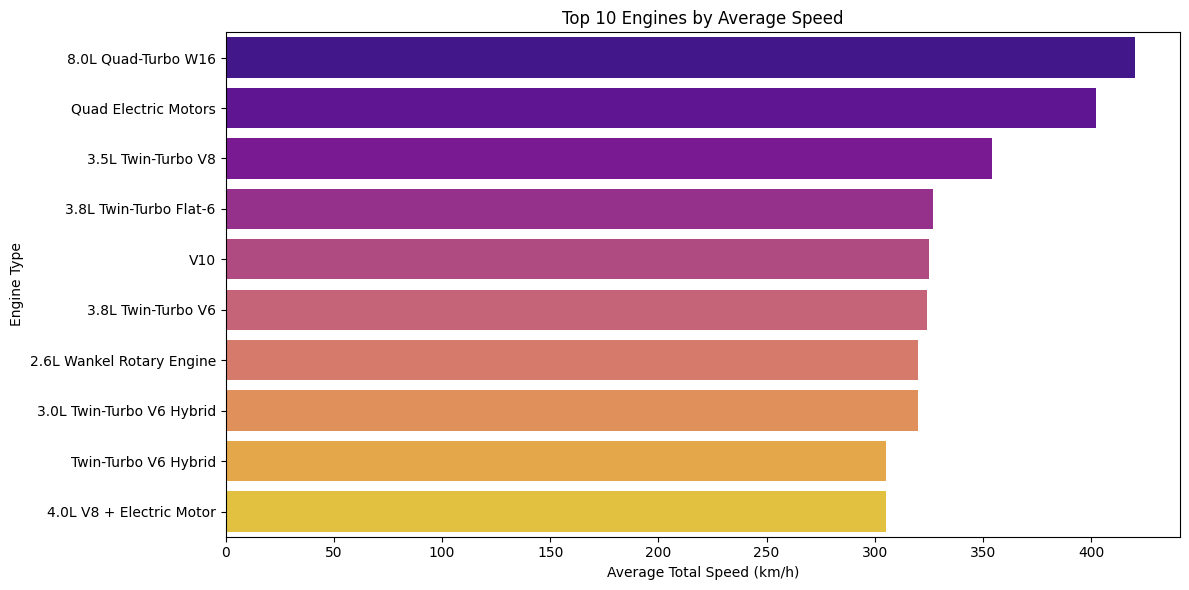

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_engines, x='Total Speed', y='Engines', palette='plasma')
plt.title('Top 10 Engines by Average Speed')
plt.xlabel('Average Total Speed (km/h)')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.show()

## Finding Fastest Cars

In [51]:
# Sort and select top 10
fastest_cars = df.sort_values(by='Total Speed', ascending=False)
top10 = fastest_cars[['Company Names', 'Cars Names', 'Total Speed']].head(10)

# Create labels on the fly (not in df)
labels = top10['Company Names'] + " - " + top10['Cars Names']


In [56]:
print(labels)

888                Bugatti - Bolide
882    Bugatti - Chiron Super Sport
889               Bugatti - Mistral
883          Bugatti - Chiron Sport
884          Bugatti - Chiron Noire
880                Bugatti - Chiron
887      Bugatti - La Voiture Noire
668              Tesla - Roadster 2
32          ASTON MARTIN - VALKYRIE
885                  Bugatti - Divo
dtype: object


C:\Users\rodai\AppData\Local\Temp\ipykernel_33208\1192801221.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='Total Speed', y='Label', palette='inferno')


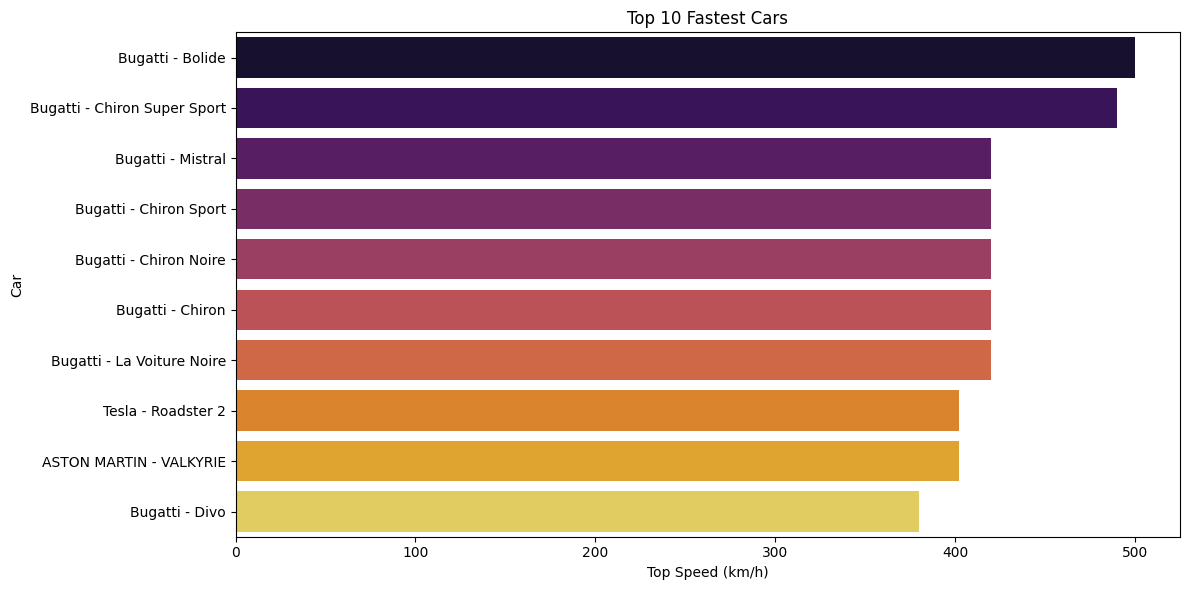

In [59]:
# Create a temporary DataFrame just for plotting
plot_df = top10.copy()
plot_df['Label'] = top10['Company Names'] + " - " + top10['Cars Names']

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='Total Speed', y='Label', palette='inferno')
plt.title('Top 10 Fastest Cars')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Car')
plt.tight_layout()
plt.show()

## BMW vs MERCEDES based on Engines

In [62]:
comparison_df = df[df['Company Names'].str.upper().isin(['BMW', 'MERCEDES'])]

# Group by brand and compare average horsepower and speed
bmw_vs_mercedes = comparison_df.groupby('Company Names')[['HorsePower', 'Total Speed']].mean()

print(bmw_vs_mercedes)

               HorsePower  Total Speed
Company Names                         
BMW            274.536585   240.463415
MERCEDES       416.950000   250.000000


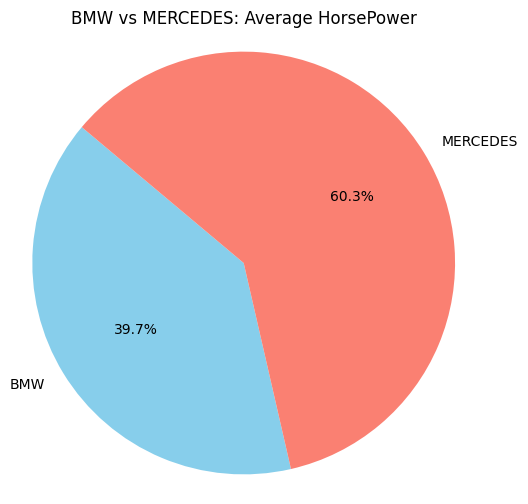

In [64]:
# Pie chart for HorsePower comparison
plt.figure(figsize=(6, 6))
plt.pie(
    bmw_vs_mercedes['HorsePower'],
    labels=bmw_vs_mercedes.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon'],
    startangle=140
)
plt.title('BMW vs MERCEDES: Average HorsePower')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()

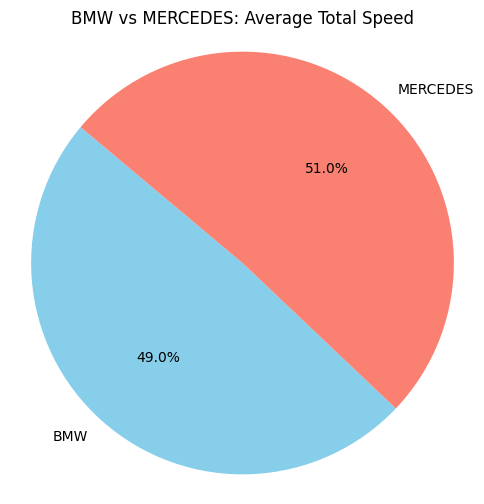

In [65]:
# Pie chart for Top Speed comparison
plt.figure(figsize=(6, 6))
plt.pie(
    bmw_vs_mercedes['Total Speed'],
    labels=bmw_vs_mercedes.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon'],
    startangle=140
)
plt.title('BMW vs MERCEDES: Average Total Speed')
plt.axis('equal')
plt.show()

## Fuel Types Analysis

In [70]:
fuel_counts = df['Fuel Types'].value_counts().reset_index()
print(fuel_counts)

         Fuel Types  count
0            Petrol    870
1            Diesel    102
2          Electric     93
3            Hybrid     78
4      PetrolDiesel     16
5      PetrolHybrid     16
6    Plug-in Hybrid      5
7   Hybrid (Petrol)      4
8      DieselPetrol      4
9          Hydrogen      3
10    Petrol Diesel      3
11    Petrol Hybrid      2
12        PetrolAWD      2
13  plug in hyrbrid      1
14   HybridElectric      1
15        CNGPetrol      1
16     HybridPetrol      1


C:\Users\rodai\AppData\Local\Temp\ipykernel_33208\2916344311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fuel_counts, x='Fuel Type', y='Count', palette='plasma')


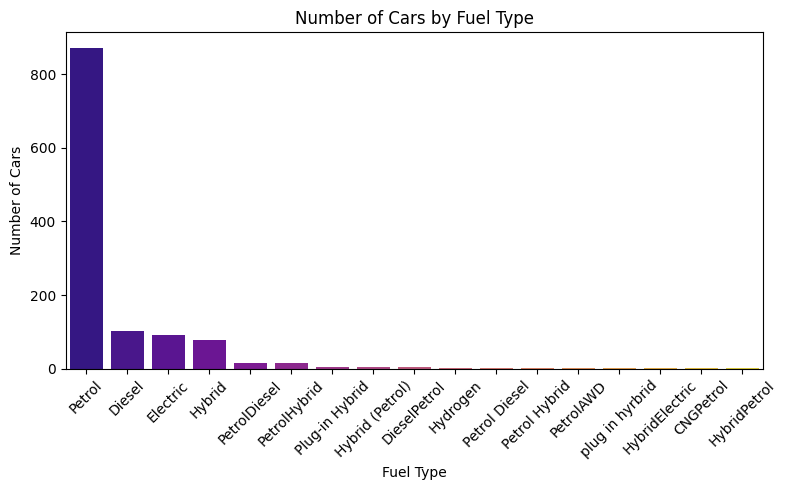

In [73]:
fuel_counts.columns = ['Fuel Type', 'Count']
plt.figure(figsize=(8, 5))
sns.barplot(data=fuel_counts, x='Fuel Type', y='Count', palette='plasma')
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
fuel_stats = df.groupby('Fuel Types')[['Total Speed', 'HorsePower']].mean()
print(fuel_stats)

                 Total Speed   HorsePower
Fuel Types                               
CNGPetrol         165.000000    86.000000
Diesel            170.950980   206.500000
DieselPetrol      162.500000  5617.250000
Electric          193.408602   401.107527
Hybrid            221.820513   320.089744
Hybrid (Petrol)   292.500000   567.500000
HybridElectric    160.000000   139.000000
HybridPetrol      180.000000   220.000000
Hydrogen          180.000000   154.666667
Petrol            225.822989   599.086207
Petrol Diesel     206.666667   225.333333
Petrol Hybrid     199.500000   187.000000
PetrolAWD         205.000000   213.500000
PetrolDiesel      188.750000  8133.187500
PetrolHybrid      198.500000   190.937500
Plug-in Hybrid    188.000000   265.600000
plug in hyrbrid   340.000000   963.000000


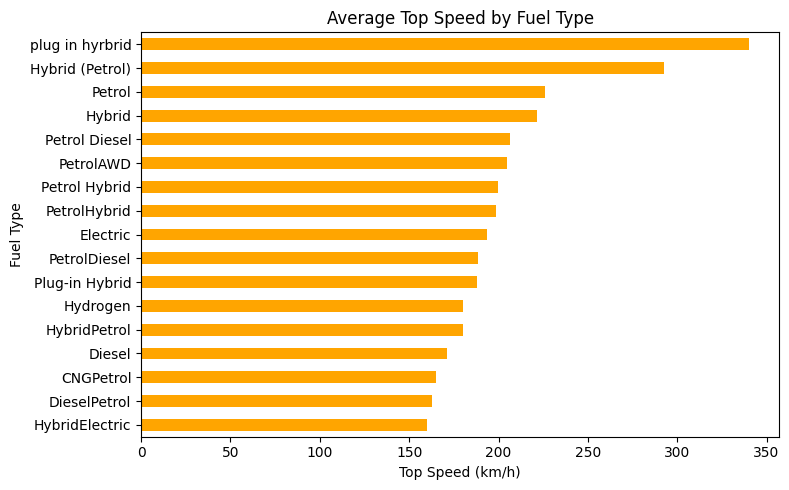

In [77]:
# Bar chart of average speed by fuel
fuel_stats['Total Speed'].sort_values().plot(kind='barh', color='orange', figsize=(8, 5))
plt.title('Average Top Speed by Fuel Type')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Fuel Type')
plt.tight_layout()
plt.show()

## Fuel type of BMW

In [78]:
bmw_fuel = df[df['Company Names'].str.upper() == 'BMW']['Fuel Types'].value_counts()

print(bmw_fuel)

Fuel Types
Petrol    30
Diesel    10
Hybrid     1
Name: count, dtype: int64


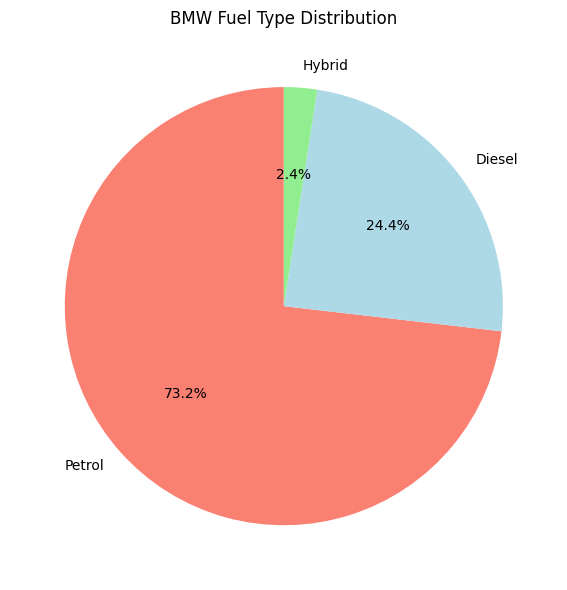

In [80]:
plt.figure(figsize=(6, 6))
bmw_fuel.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightblue', 'lightgreen', 'lightcoral'])
plt.title('BMW Fuel Type Distribution')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

In [ ]:
# save your cleaned DataFrame (e.g. df) to Excel
df.to_excel('cleaned_cars_dataset.xlsx', index=False)